In [2]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex. tools import input_factory, plot_tools



WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Cannot use weave, a test compilation failed: error: Microsoft Visual C++ 9.0 is required. Get it from http://aka.ms/vcpython27 (CompileError) [brian2.codegen.runtime.weave_rt.weave_rt.failed_compile_test]
WARNING    D:\Programas\Miniconda2\envs\bmnn\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Renan\.cython\brian_extensions\_cython_magic_27b00bb86644851871cb5598a1fc7683.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
 [py.warnings]
WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 9.0 is required. Get it from http://aka.ms/vcpython27 (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back

Missing compiler_cxx fix for MSVCCompiler
nr of spikes: 10
spikes times: [  6.8  16.2  25.6  35.   44.4  53.8  63.2  72.6  82.   91.4] ms


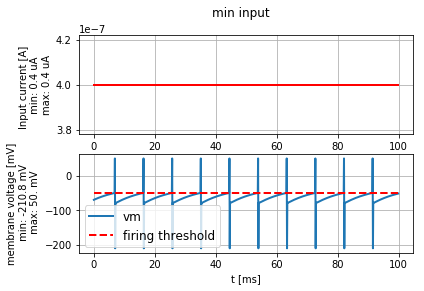

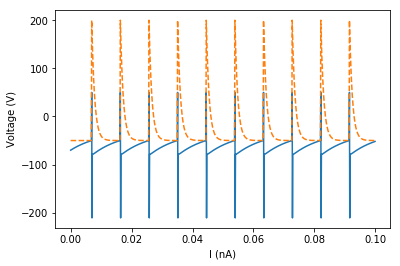

In [3]:
#Exercicio 1A
#Qual a mínima corrente aplicada necessária para que o neurônio produza disparos? 
# Calcule essa corrente usando a equação 2.11 do livro do Miller (ou equação 9 da aula 12 nas notas de aula)
# e depois simule o modelo com correntes aplicadas (i) ligeiramente menores e
# (ii) ligeiramente maiores que essa corrente mínima. Em cada caso, faça o gráfico do potencial de membrana, V(t), 
# por um intervalo de tempo de 200 ms (ou um intervalo entre disparos completo se este for mais longo). 

#Baseado na função simulate_LIF_neuron do arquivo LIF.py
"""Basic leaky integrate and fire neuron implementation.

Args:
    input_current (TimedArray): TimedArray of current amplitudes. One column per current_injection_location.
    simulation_time (Quantity): Time for which the dynamics are simulated: 5ms
    v_rest (Quantity): Resting potential: -70mV
    v_reset (Quantity): Reset voltage after spike - 65mV
    firing_threshold (Quantity) Voltage threshold for spiking -50mV
    membrane_resistance (Quantity): 10Mohm
    membrane_time_scale (Quantity): 8ms
    abs_refractory_period (Quantity): 2ms

Returns:
    StateMonitor: Brian2 StateMonitor for the membrane voltage "v"
    SpikeMonitor: Biran2 SpikeMonitor
"""
v_rest= -70*b2.mV #EL
v_reset= -65*b2.mV #Vreset
membrane_resistance = 100*b2.Mohm #RM
membrane_capacitance = 0.1*b2.nF #CM
firing_threshold = -50 * b2.mV #VL

tau_refractory =  1.0*b2.ms
Vth_reset =  200*b2.mV
E_k = -80*b2.mV

tau_Gref = 0.2*b2.ms
deltaG = 2*b2.usiemens
Gref_0 = 0*b2.siemens

simulation_time = 100
dt =  0.01 * b2.ms 

current = 200.01 * b2.pamp
current = [400]
# differential equation of Leaky Integrate-and-Fire model
eqs = """
dGref/dt = -Gref/tau_Gref : siemens
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (Gref *(E_k - v))/membrane_capacitance + (current/membrane_capacitance) ) : volt (unless refractory)
dVth/dt = (firing_threshold - Vth)/tau_refractory :  volt
current : amp
"""
v_reset_high = 50*b2.mV
# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    1, model=eqs, reset="v=v_reset_high; Vth=Vth_reset; Gref=Gref+deltaG", threshold="v>Vth",
    refractory=False, method="euler")
neuron.v = v_rest  # set initial value
neuron.Vth = firing_threshold
neuron.Gref = Gref_0
neuron.current = current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "Vth", "Gref"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

input_current = input_factory.get_step_current(
t_start=0, t_end=simulation_time, unit_time=b2.ms,
amplitude= current*b2.nA) 
graph_c, graph_c = plot_tools.plot_voltage_and_current_traces(
state_monitor, input_current, title="min input", firing_threshold=firing_threshold)
# for t in spike_monitor.t:
#    graph_c.axvline(t/b2.ms, ls='--', c='C1', lw=3)   
print("nr of spikes: {}".format(spike_monitor.count[0]))
print("spikes times: {}".format(spike_monitor.t[:]))

plt.figure(2)
plt.plot(state_monitor.t, state_monitor.v[0]/b2.mV)
plt.xlabel('I (nA)')
plt.ylabel('Voltage (V)')
plt.plot(state_monitor.t,state_monitor.Vth[0]/b2.mV, "--") 
#plt.plot(neuron.current/b2.pA, spike_monitor.count/simulation_time)


WARNING    "current" is an internal variable of group "neurongroup_3", but also exists in the run namespace with the value array([100, 110, 120, ..., 570, 580, 590]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


nr of spikes: <spikemonitor_2.count: array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58,  71,
        83,  92, 101, 110, 118, 126, 134, 142, 149, 156, 164, 171, 178,
       185, 192, 198, 206, 213, 220, 224, 232, 238, 244, 250, 256, 263,
       270, 278, 281, 290, 294, 298, 308, 312, 317, 322, 328])>
spikes times: [    4.1     4.2     4.2 ...,  1999.5  1999.6  1999.9] ms


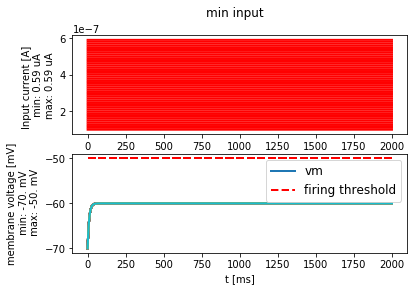

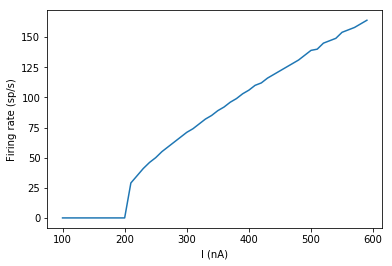

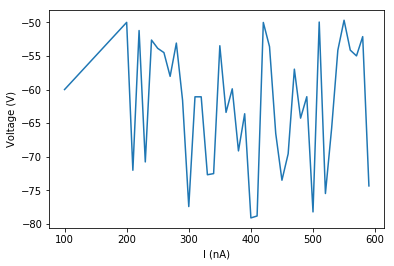

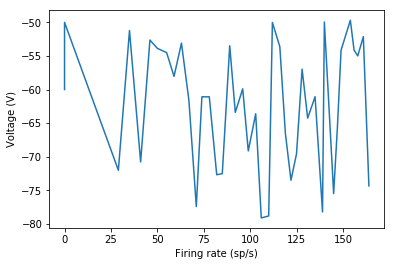

In [37]:
#Exercicio 1A
#Qual a mínima corrente aplicada necessária para que o neurônio produza disparos? 
# Calcule essa corrente usando a equação 2.11 do livro do Miller (ou equação 9 da aula 12 nas notas de aula)
# e depois simule o modelo com correntes aplicadas (i) ligeiramente menores e
# (ii) ligeiramente maiores que essa corrente mínima. Em cada caso, faça o gráfico do potencial de membrana, V(t), 
# por um intervalo de tempo de 200 ms (ou um intervalo entre disparos completo se este for mais longo). 

#Baseado na função simulate_LIF_neuron do arquivo LIF.py
"""Basic leaky integrate and fire neuron implementation.

Args:
    input_current (TimedArray): TimedArray of current amplitudes. One column per current_injection_location.
    simulation_time (Quantity): Time for which the dynamics are simulated: 5ms
    v_rest (Quantity): Resting potential: -70mV
    v_reset (Quantity): Reset voltage after spike - 65mV
    firing_threshold (Quantity) Voltage threshold for spiking -50mV
    membrane_resistance (Quantity): 10Mohm
    membrane_time_scale (Quantity): 8ms
    abs_refractory_period (Quantity): 2ms

Returns:
    StateMonitor: Brian2 StateMonitor for the membrane voltage "v"
    SpikeMonitor: Biran2 SpikeMonitor
"""
v_rest= -70*b2.mV #EL
v_reset= -65*b2.mV #Vreset
membrane_resistance = 100 * b2.Mohm #RM
membrane_capacitance = 0.1*b2.nF #CM
firing_threshold = -50 * b2.mV #VL

tau_refractory =  1.0*b2.ms
Vth_reset =  200*b2.mV
E_k = -80*b2.mV

tau_Gref = 0.2*b2.ms
deltaG = 2*b2.usiemens
Gref_0 = 0*b2.siemens

simulation_time = 2
dt =  0.01 * b2.ms 


#current = [100., 200, 200.01, 250, 300, 350, 400, 450, 500, 600]
current = np.arange(100, 600, 10)
eqs = """
dGref/dt = -Gref/tau_Gref : siemens
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (Gref *(E_k - v))/membrane_capacitance + (current/membrane_capacitance) ) : volt
dVth/dt = (firing_threshold - Vth)/tau_refractory :  volt
current : amp
"""
# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    len(current), model=eqs, reset="Vth=Vth_reset; Gref=Gref+deltaG", threshold="v>Vth",
    refractory=False, method="euler")
neuron.v = v_rest  # set initial value
neuron.Vth = firing_threshold
neuron.Gref = Gref_0
neuron.current = current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "Vth", "Gref"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.second)

#plot
input_current = [None]*len(current)
for i in range(len(current)):
    input_current[i] = input_factory.get_step_current(
    t_start=0, t_end=simulation_time, unit_time=b2.second,
    amplitude= current[i]*b2.nA) 
    plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current[i], title="min input", firing_threshold=firing_threshold)

plt.figure(2)
print("nr of spikes: {}".format(spike_monitor.count))
print("spikes times: {}".format(spike_monitor.t[:]))
plt.plot(neuron.current/b2.pA, spike_monitor.count/simulation_time)
plt.xlabel('I (nA)')
plt.ylabel('Firing rate (sp/s)')
plt.show()

plt.figure(3)
plt.plot(neuron.current/b2.pA, neuron.v/b2.mV)
plt.xlabel('I (nA)')
plt.ylabel('Voltage (V)')
plt.show()

plt.figure(4)
plt.plot(spike_monitor.count/simulation_time, neuron.v/b2.mV)
plt.xlabel('Firing rate (sp/s)')
plt.ylabel('Voltage (V)')
plt.show()